<a href="https://colab.research.google.com/github/ameyaoka/micrograd-implementation/blob/main/micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Micrograd 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def f(x):
  return 3*x**2 -4*x + 5

In [3]:
f(3.0)

20.0

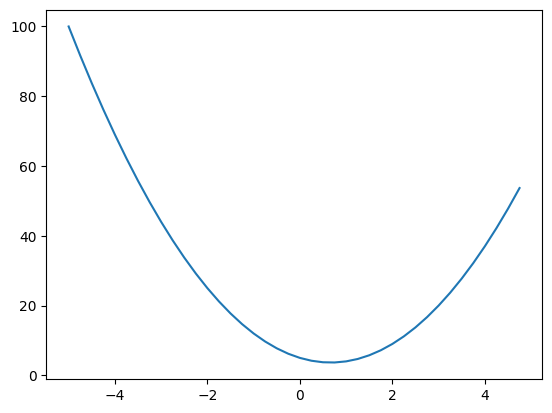

In [4]:
xs = np.arange(-5,5,0.25)
ys=  f(xs)
plt.plot(xs,ys)

- **Slope**

In [5]:
h = 0.00001
x= 3.0 
(f(x+h) - f(x))/h

14.00003000000538

In [6]:

h = 0.00001
x= -3.0 
(f(x+h) - f(x))/h

-21.999970000052823

In [7]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)



4.0


 - **derivative with respect to a**

In [8]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 3.999699999999999
slope -3.000000000010772


- **Derivative with repect to b**

In [9]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0002
slope 2.0000000000042206


In [10]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h         # a = a+h 
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [11]:
class Value:
  
  def __init__(self, data):
    self.data = data
  
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d= a*b +c
d

Value(data = 4.0)


1. The __init__ method initializes a Value object with the provided data value and an optional _children and _op argument 
  - _children is a set of previous Value objects that contributed to the current value
  - l _op parameter, which represents the operation performed to obtain the current value. The _op attribute is then set accordingly.
2. The __add__ method overloads the + operator.

  - defines the addition operation between two Value objects.
  -

3. The __mul__ method overloads the * operator 
  - defines the  multiplication operation between two Value objects.

 - class : In oops a class is a blueprint for creating objects (instances) that sare common properties(attributes) and behavior (method).

- __init__ is a special method known as constructor.

- constructor used to initialize objects attributes.


- __init__ is dunder method .

- dunder method is a method that allows instances of a class to interact with builtin function and operators of language.
- dunder comes from double underscore.


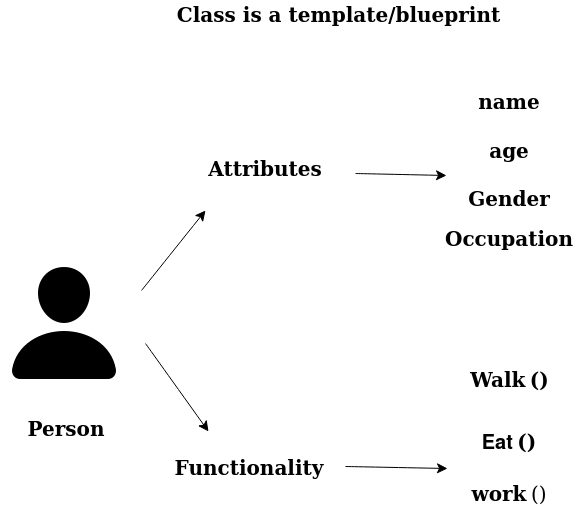





In [44]:
class Value:
  
  def __init__(self, data,_children=(),_op='',label=''):
    self.data = data
    self.grad = 0.0             # initially we assume gradient is 0 ie changing the var will not effect output.
    self._prev = set(_children)
    self._op = _op 
    self.label = label 
  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data ,(self,other),'+')
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data ,(self,other),'*')
    return out


a = Value(2.0 , label='a')
b = Value(-3.0, label='b')
c = Value(10.0 , label = 'c')
e = a*b ; e.label = 'e'
d= e +c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0)

In [13]:
d.v

{Value(data = -6.0), Value(data = 10.0)}

In [28]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [29]:
d._op

'+'

In [20]:
! pip install graphviz
from graphviz import Digraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
def trace(root):
  nodes, edges = set(), set()
  def build(v):
      if v not in nodes:
          nodes.add(v)
          for child in v._prev:
              edges.add((child, v))
              build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid , label = "{ %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
              dot.node(name = uid + n._op ,label=n._op)
              dot.edge(uid + n._op, uid)

  
    for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

-  rectangle shape is for value objects.

- oval shape is for operations.which were applied on val .



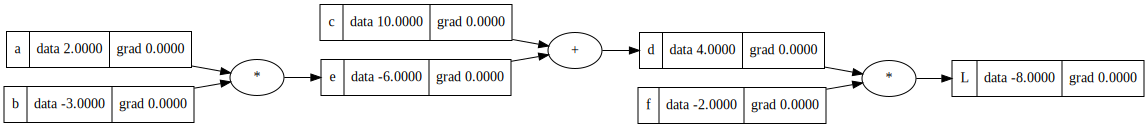

In [47]:
draw_dot(L)

- We build a mathematical expression .
- 

In [ ]:
L.grad= 1.0